In [1]:
import pandas as pd
df=pd.read_csv(r'600123.csv')
df.head()
raw_time = pd.to_datetime(df.pop('日期'), format='%Y/%m/%d')
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

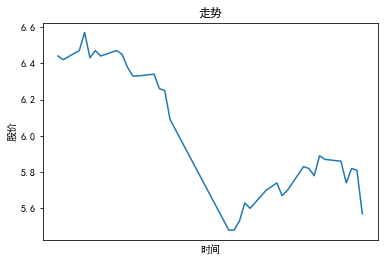

In [2]:
# 折线图：股票走势
plt.plot(raw_time, df['收盘'])
plt.xlabel('时间')
plt.ylabel('股价')
plt.title('走势')
plt.xticks([])
plt.show()

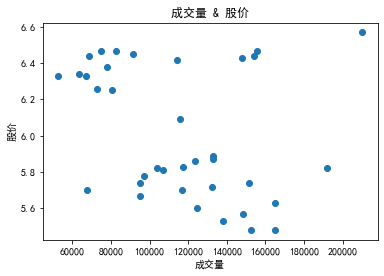

In [3]:
# 散点图：成交量和股价
plt.scatter(df['成交量(手)'], df['收盘'])
plt.xlabel('成交量')
plt.ylabel('股价')
plt.title('成交量 & 股价')
plt.show()

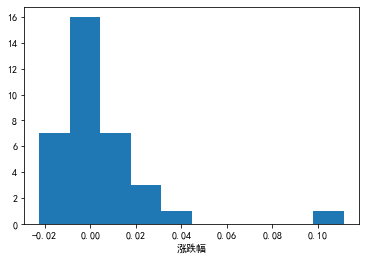

In [4]:
# 直方图
daily_return = df['收盘'].pct_change().dropna()
plt.hist(daily_return)
plt.xlabel('涨跌幅')
plt.show()

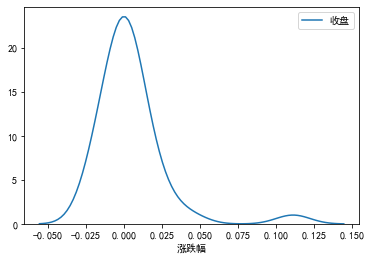

In [5]:
# 核密度估计
sns.kdeplot(daily_return)
plt.xlabel('涨跌幅')
plt.show()

               开盘        收盘        涨幅        涨跌        最低        最高    成交量(手)  \
开盘       1.000000  0.983796  0.074466  0.078567  0.993820  0.988992 -0.340036   
收盘       0.983796  1.000000  0.188685  0.191693  0.993159  0.993217 -0.295007   
涨幅       0.074466  0.188685  1.000000  0.999432  0.117263  0.153004 -0.069225   
涨跌       0.078567  0.191693  0.999432  1.000000  0.120968  0.156207 -0.068844   
最低       0.993820  0.993159  0.117263  0.120968  1.000000  0.991119 -0.337382   
最高       0.988992  0.993217  0.153004  0.156207  0.991119  1.000000 -0.264037   
成交量(手)  -0.340036 -0.295007 -0.069225 -0.068844 -0.337382 -0.264037  1.000000   
成交额(千元) -0.148689 -0.101106 -0.023787 -0.022234 -0.144953 -0.068811  0.978676   
换手率     -0.340033 -0.295011 -0.069252 -0.068871 -0.337383 -0.264039  1.000000   

          成交额(千元)       换手率  
开盘      -0.148689 -0.340033  
收盘      -0.101106 -0.295011  
涨幅      -0.023787 -0.069252  
涨跌      -0.022234 -0.068871  
最低      -0.144953 -0.337383  
最高      -

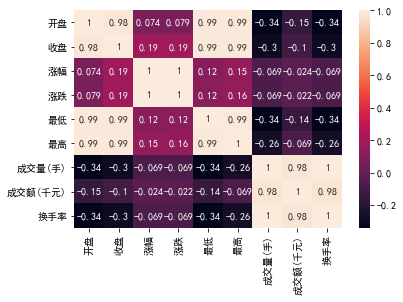

In [6]:
# 相关系数矩阵
correlation = df.corr()
print(correlation)
sns.heatmap(correlation, annot=True)
plt.show()

In [7]:
import pandas as pd  # 数据处理
import datetime  # 时间格式处理
from matplotlib.pylab import date2num  # 时间格式处理
from matplotlib import pyplot as plt  # 绘图
from mplfinance.original_flavor import candlestick_ochl  # 绘制k线图
from matplotlib import ticker as mticker  # 刻度处理
from matplotlib import dates as mdates  # 时间格式处理

In [8]:
data = pd.read_csv('600123.SH.csv')
data = data.dropna().reset_index().drop(columns='index')
raw_time = data.pop('trade_time')
date_times = []
dates = []
times = []
date_time_format = '%Y-%m-%d %H:%M:%S'  # 原str中的日期-时间格式
date_format = '%Y%m%d'  # 待转日期格式
time_format = '%H:%M:%S'  # 待转时间格式

In [9]:
# 将str转为datetime.datetime
for i in raw_time:
    date_times.append(datetime.datetime.strptime(i, date_time_format))
    

# 将日期与时间拆开，且此时的日期与时间的类型又变成str
for date_time in date_times:
    dates.append(date_time.strftime(date_format))
    times.append(date_time.strftime(time_format))

# 把分离并调整格式的日期和时间储存在data中
data['date'] = dates
data['time'] = times
data_ = data.copy()  # 为避免污染源数据，将数据拷贝至新的DataFrame中进行处理，copy()方法默认深拷贝，之后我们还会提到这个概念
data_.drop(data_[(data_.time < '09:31:00') | (data_.time > '15:00:00')].index, inplace=True)  # 把非开盘时间通过字符串比较大小去除
data_ = data_.reset_index().drop(columns='index')
data_.head()

,open,close,high,low,vol,amount,date,time
0,11.07,11.07,11.07,11.02,587300.0,6497535.0,20150702,09:31:00
1,11.06,11.01,11.08,11.01,326008.0,3600282.0,20150702,09:32:00
2,11.00,10.95,11.00,10.93,583192.0,6404118.0,20150702,09:33:00
3,10.89,10.73,10.89,10.70,306043.0,3311184.0,20150702,09:34:00
4,10.73,10.73,10.76,10.68,648400.0,6946685.0,20150702,09:35:00


In [10]:
Open = data_['open'][0::240].reset_index().drop(columns='index')
Close = data_['close'][239::240].reset_index().drop(columns='index')
High = data_[['high', 'date']].groupby('date').max().reset_index()
Low = data_[['low', 'date']].groupby('date').min().reset_index()
Dates = High['date']
plot_dates = []
for Date in Dates:
    plot_date = datetime.datetime.strptime(Date, date_format)  # 先把日期格式转回datetime.datetime以满足date2num()的类型要求
    plot_dates.append(date2num(plot_date))
plot_mat = pd.DataFrame()
plot_mat['time'] = plot_dates
plot_mat['open'] = Open
plot_mat['close'] = Close
plot_mat['high'] = High['high']
plot_mat['low'] = Low['low']
plot_mat.head()

,time,open,close,high,low
0,16618.0,11.07,9.87,11.13,9.86
1,16619.0,9.61,8.89,10.00,8.89
2,16622.0,9.68,8.52,9.68,8.13
3,16623.0,8.21,7.69,8.49,7.69
4,16624.0,6.94,6.92,7.22,6.92


In [11]:
mov_avg_ten = plot_mat['close'].rolling(window=10).mean() # 计算每10天收盘价的均值，每次向下滚动1天
mov_avg_thirty = plot_mat['close'].rolling(window=30).mean()  # 计算每30天收盘价的均值，每次向下滚动1天
Volume = data_[['date', 'vol']].groupby(by='date').sum().reset_index()

In [12]:
def cal_rsi(df0, period=6):  # 默认周期为6日
    df0['diff'] = df0['close'] - df0['close'].shift(1)  # 用diff储存两天收盘价的差
    df0['diff'].fillna(0, inplace=True)  # 空值填充为0
    df0['up'] = df0['diff']  # diff赋值给up
    df0['down'] = df0['diff']  # diff赋值给down
    df0['up'][df0['up'] < 0] = 0  # 把up中小于0的置零
    df0['down'][df0['down'] > 0] = 0  # 把down中大于0的置零
    df0['avg_up'] = df0['up'].rolling(period).sum() / period  # 计算period天内平均上涨点数
    df0['avg_down'] = abs(df0['down'].rolling(period).sum() / period)  # 计算period天内评价下跌点数
    df0['avg_up'].fillna(0, inplace=True)  # 空值填充为0
    df0['avg_down'].fillna(0, inplace=True)  # 空值填充为0
    df0['rsi'] = 100 - 100 / (1 + (df0['avg_up'] / df0['avg_down']))  # 计算RSI
    return df0  # 返回原DataFrame
plot_mat = cal_rsi(plot_mat)
def cal_ema(df0, period, is_dea=False):  # DEA与EMA的计算方式相同，封装在同一个函数中，用is_dea来确认是否是DEA
    for i in range(len(df0)):
        if not is_dea:
            if i == 0:
                df0.loc[i, 'ema'+str(period)] = df0.loc[i, 'close']  # EMA初始值为当天收盘价
            else:
                df0.loc[i, 'ema'+str(period)] = (2*df0.loc[i, 'close']+(period-1)*df0.loc[i-1, 'ema'+str(period)])/(period+1)  # 按公式计算
            ema = df0['ema'+str(period)]
        else:
            if i == 0:
                df0.loc[i, 'dea'+str(period)] = df0.loc[i, 'dif']
            else:
                df0.loc[i, 'dea'+str(period)] = ((period-1)*df0.loc[i-1, 'dea'+str(period)]+2*df0.loc[i, 'dif']) / (period+1)
            ema = df0['dea'+str(period)]
    return ema
def cal_macd(df0, short=12, long=26, m=9):
    short_ema = cal_ema(df0, short)  # 计算12日EMA
    long_ema = cal_ema(df0, long)  # 计算26日EMA
    df0['dif'] = short_ema - long_ema  # 计算DIF
    dea = cal_ema(df0, m, is_dea=True)  # 计算DEA
    df0['macd'] = 2 * (df0['dif'] - df0['dea'+str(m)])  # 计算MACD
    return df0
plot_mat = cal_macd(plot_mat)

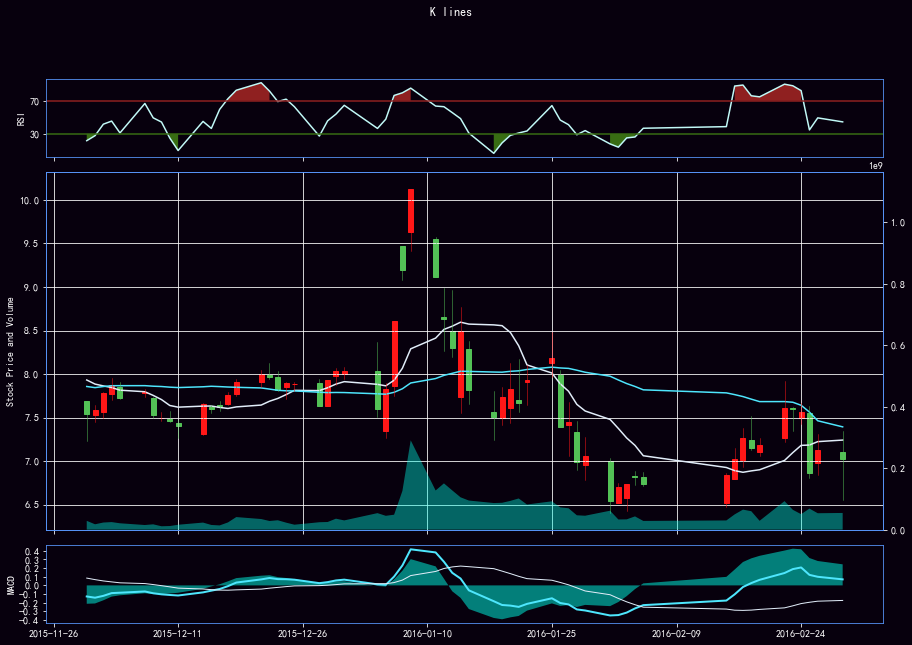

In [13]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
# 绘制10日与30日均线
ax.plot(plot_mat.time[100:160].values, mov_avg_ten[100:160], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[100:160].values, mov_avg_thirty[100:160], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[100:160].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
# 绘制成交量图
ax_ = ax.twinx()  # 共享绘图区域
ax_.fill_between(plot_mat.time[100:160].values, 0, Volume.vol[100:160].values,
                facecolor='#00ffe8', alpha=0.4)  # 把[0, volume]之间空白填充颜色，alpha设置透明度
ax_.grid(False)  # 不显示成交量的网格
ax_.set_ylim(0, 4*Volume.vol.values[100:160].max())  # 成交量的y轴范围，为使成交量线处在较下方，设置刻度最大值为成交量最大值的四倍
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')
# 绘制RSI曲线
ax0 = plt.subplot2grid((6, 4), (0, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')  # 第1行第1列起画，占1行4列
col_rsi = '#c1f9f7'  # RSI曲线的颜色
col_pos = '#8f2020'  # 上辅助线及其填充色
col_neg = '#386d13'  # 下辅助线及其填充色
ax0.plot(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, col_rsi, linewidth=1.5)  # RSI曲线及其颜色，线宽
ax0.axhline(70, color=col_pos)  # 上辅助线及其颜色
ax0.axhline(30, color=col_neg)  # 下辅助线及其颜色
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 70, where=(plot_mat.rsi.values[100:160] >= 70),
                 facecolors=col_pos)  # 把RSI曲线大于等于70的部分填充为红色
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 30, where=(plot_mat.rsi.values[100:160] <= 30),
                 facecolors=col_neg)  # 把RSI曲线小于等于30的部分填充为绿色
ax0.set_yticks([30, 70])  # 设置辅助线的刻度
ax0.spines['bottom'].set_color("#5998ff")
ax0.spines['top'].set_color("#5998ff")
ax0.spines['left'].set_color("#5998ff")
ax0.spines['right'].set_color("#5998ff")
ax0.tick_params(axis='x', colors='w')
ax0.tick_params(axis='y', colors='w')
plt.ylabel('RSI', color='w')
# 绘制MACD线
ax1 = plt.subplot2grid((6, 4), (5, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d') # 第6行第1列起，占1行4列
ax1.plot(plot_mat.time[100:160].values, plot_mat.macd[100:160].values, color='#4ee6fd', linewidth=2)  # MACD线
ax1.plot(plot_mat.time[100:160].values, plot_mat.dea9[100:160].values, color='#e1edf9', linewidth=1)  # DEA线
ax1.fill_between(plot_mat.time[100:160].values, plot_mat.macd[100:160].values-plot_mat.dea9[100:160].values, 0,
                 alpha=0.5, facecolors='#00ffe8')  # 填充差值
ax1.yaxis.set_major_locator(mticker.MaxNLocator())  # 设置纵坐标
ax1.spines['bottom'].set_color('#5998ff')
ax1.spines['top'].set_color('#5998ff')
ax1.spines['left'].set_color('#5998ff')
ax1.spines['right'].set_color('#5998ff')
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
plt.ylabel('MACD', color='w')
plt.setp(ax.get_xticklabels(), visible=False)  # 隐藏ax的x轴
plt.setp(ax0.get_xticklabels(), visible=False)  # 隐藏ax0的x轴
plt.suptitle('K lines', color='w')  # 绘制标题
plt.show()